# This notebook is used to create embeddings for the books attributes and the users profiles with some exploration of the embeddings that has been explained in the repport .

In [1]:
from sentence_transformers import SentenceTransformer
import torch
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("all-mpnet-base-v2", device=device)

## 1. Books attributes embeddings

In [2]:
# load the all atributes data dict
with open('../data/books/augmented_items_attributes_dict.json', 'r') as f:
    all_attributes = json.load(f)
print("Number of books: ", len(all_attributes))

Number of books:  33962


In [5]:
# create a list of sentences from the attributes of the books and encode them with the model
import re
pattern = r'[,\|]'
books_attributes_sentences = []
for book_id in all_attributes.keys() :
    sentence = ""
    for key in all_attributes[book_id]:
        element = re.sub(pattern, '', all_attributes[book_id][key]) 
        sentence += element + ","
    books_attributes_sentences.append(sentence)
# encode the sentences and save the embeddings in a pickle file
#books_attributes_embeddings = model.encode(books_attributes_sentences)
#pd.DataFrame(books_attributes_embeddings).to_pickle('../data/books/books_attributes_embeddings.pkl')


In [2]:
# load the embeddings from the pickle file
books_attributes_embeddings = pd.read_pickle('../data/books/books_attributes_embeddings.pkl')

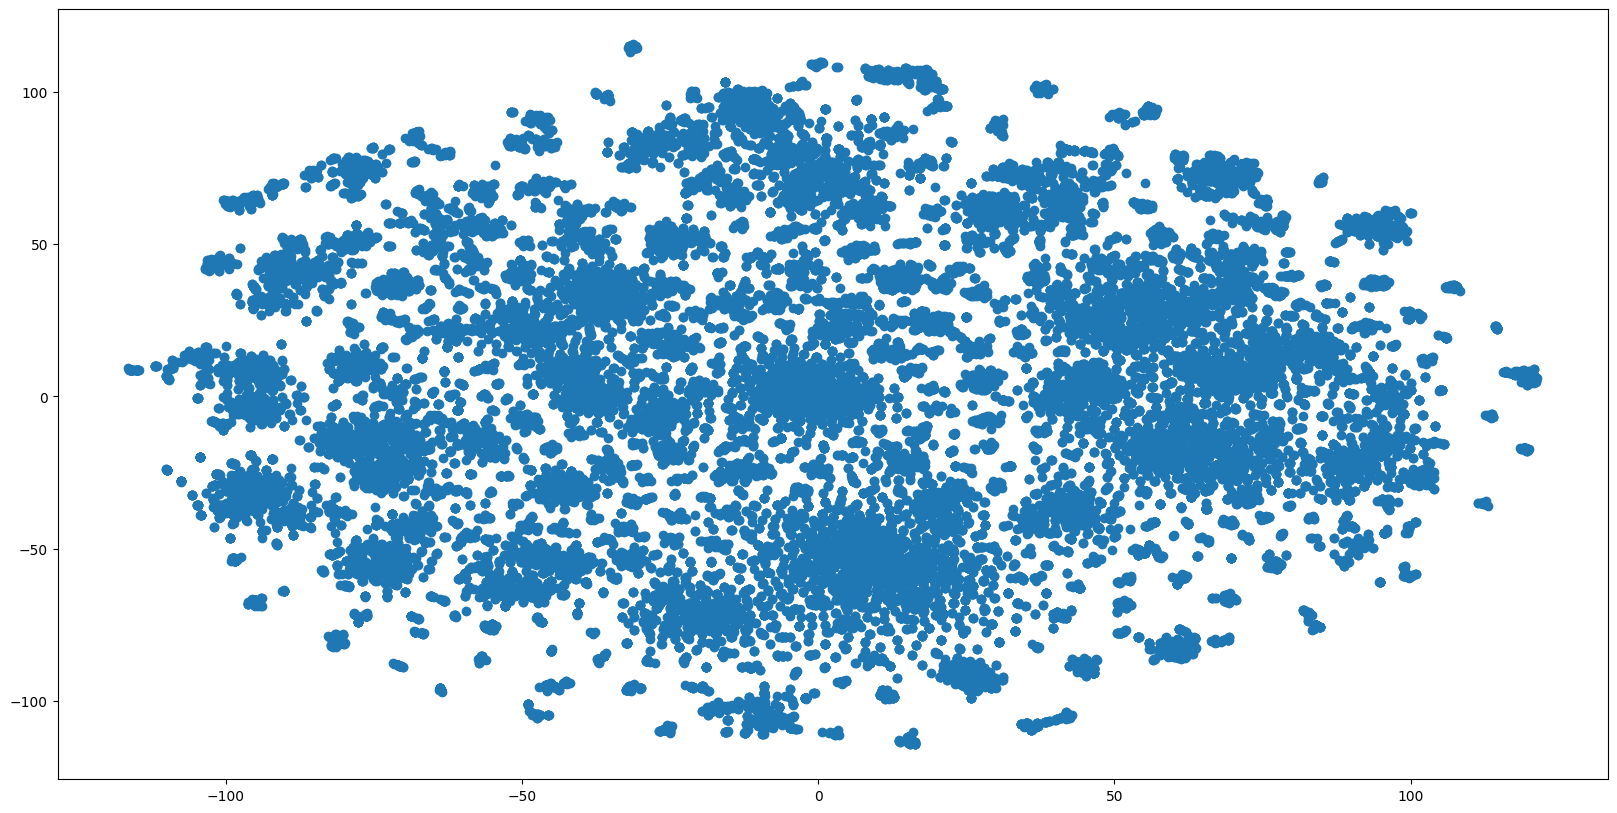

In [3]:
# reduce the dimensionality of the embeddings to 2 dimensions with t-SNE
tsne = TSNE(n_components=2,metric='cosine')
tsne_embeddings = tsne.fit_transform(books_attributes_embeddings)
# plot the embeddings
plt.figure(figsize=(20,10))
plt.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1])
plt.show()

## 2. Users profiles embeddings

In [7]:
# load user profiles data 
user_profiles = pd.read_csv('../data/books/augmented_users_profiles.csv',sep=";")
user_profiles.head()

,age,gender,liked_genre,disliked_genre,liked_authors,country,language
0,35,female,Fiction,Non-fiction,"Anita Diamant, Lilian Jackson Braun",Canada,English
1,35,female,"fantasy, science fiction, mystery, memoir, sho...",Epic Theatre,"Garth Nix, Shel Silverstein, David G. Hartwell...",USA,English
2,35,female,"Adventure, Science Fiction, Fantasy, Horror, M...",Romance,"Michael Crichton, J. K. Rowling, Stephen King,...",Ireland,English
3,35,female,"romance, adventure, fantasy, memoir",science fiction,"Jane Austen, Robert Louis Stevenson, Maya Ange...",United Kingdom,English
4,35,female,"romance, self-help, children's literature",Genetic engineering,"Marianne Williamson, Danielle Steel, Philip D....",United States,English


In [17]:
# create a list of sentences from the attributes of the users and encode them with the model
user_profiles_sentences = []
for user_id in user_profiles.index:
    sentence = ""
    for key in user_profiles.columns:
        element = user_profiles.loc[user_id, key]
        if not pd.isnull(element):
            sentence +=  str(element) + ". "
        else : 
            raise ValueError(f"User {user_id} has no value for {key}")
    user_profiles_sentences.append(sentence)

#user_profiles_embeddings = model.encode(user_profiles_sentences)
#pd.DataFrame(user_profiles_embeddings).to_pickle('../data/books/users_profiles_embeddings.pkl')

In [21]:
# load the embeddings from the pickle file
user_profiles_embeddings = pd.read_pickle('../data/books/users_profiles_embeddings.pkl')

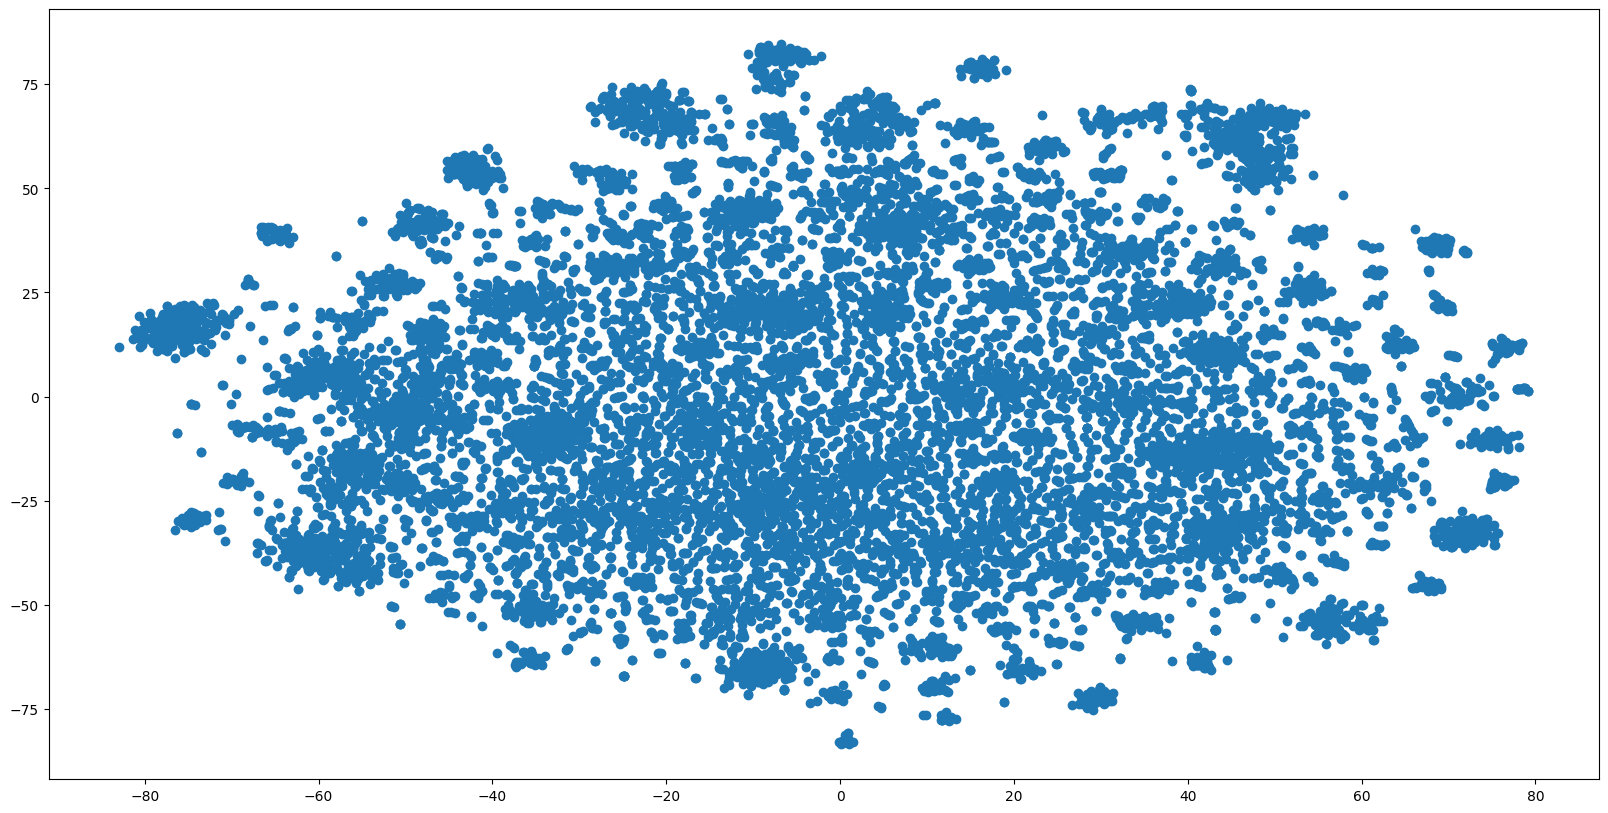

In [25]:
# reduce the dimensionality of the embeddings to 2 dimensions with t-SNE
tsne = TSNE(n_components=2,metric='cosine')
tsne_embeddings = tsne.fit_transform(user_profiles_embeddings)
# plot the embeddings
plt.figure(figsize=(20, 10))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.show()